<a href="https://colab.research.google.com/github/geunkim/Artificial-Intelligence/blob/master/Code/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machin Learning Models** 
이 페이지는 머신 러닝 관련 모델 정리를 위한 것입니다. 


* 참고자료
  - [Learn TensorFlow 1: The "Hello World" of machine learning](https://codelabs.developers.google.com/codelabs/tensorflow-lab1-helloworld/#3)
  - 조르디 토레스 - 텐서플로 첫걸음 (텐서플로 1.0) 


 ### **[common] Imports**

  * numpy 라는 라이브러리를 import한 후 쉽게 사용하기 위해 'np' 라고 부르기로 함
  * TensorFlow를 import하고 쉽게 사용하기 위해 'tf'로 부르기로 함
  * sequential layer로 신경망을 정의하기 위한 프레임워크로 'keras'를 import 함  

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## **MODEL 1: simple learning model**

다음의 x와 y 관계가 다음과 같다. 이를  관계로 부터 학습을 하여 모델을 정립하고 새로운 x에 대한 예측 값을 구해서 학습 결과를 검증한다. 

<table>
  <tr>
    <td> x: </td>
    <td> -1 </td>
    <td>  0 </td>
    <td>  1 </td>
    <td>  2 </td> 
    <td>  3 </td>
    <td>  4 </td>
  </tr> 
  <tr>
    <td> y: </td>
    <td> -2 </td>
    <td>  1 </td>
    <td>  4 </td>
    <td>  7 </td>
    <td> 10 </td>
    <td> 13 </td>
  </tr>
</table>

### **1. Define and compile the neural network (신경망의 정의 및 컴파일)**

단순하고 가능한 **신경망 네트워크를 생성**한다. 이 네트워크는 뉴런이 하나인 계층이 하나이고 입력은 하나이다.

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

다음 신경망을 컴파일하는 코드를 작성하여야 한다. 컴파일할 때 손실('**loss**')과 최적화기('**optimizer**')의 두 함수를 규정해야 한다. 

머신 러닝 공부를 하면서 많은 수학식을 보았다면 보통 여기서 사용된다. 그러나 이 경우에는 많은 함수들이 캡슐화되었다.  

'**loss**' 함수는 정답에 대해서 추론한 답을 측정하고 추론이 얼마나 잘 되었는지 잘 못되었는지 측정하느데 사용된다. 

모델은 다른 추론을 하기 위해서 최적화기('**optimizer**')를 사용한다. 손실(**loss**)함수의 결과를 기반으로 loss(손실)를 최소화를 추진한다.

모델은 다음에 보게 될 이러한 과정(**epoch**)을 여러번 반복한다.

그러나 먼저 손실에 대해 평균제곱오차('**mean squared error**')를 최적화기에 대해 확률적 경사하강('sgd')('**stochastic gradient descent**')를 사용하는 방법을
이야기한다. 

시나리오에 따라 적절한 손실 함수와 최적화기 함수가 있으며 이는 다른 모델에서 다룬다.

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### **2. Providing the data (데이터 제공)**

다음으로 학습을 위한 데이터를 제공한다. 'numpy'라는 파이썬 라이브롤는 여러 배열 형태 자료구조를 제공하며 텐서플로우에서 사실 표준(defacto standard)으로 사용된다. 

앞에서 제시한 데이터를 'numpy'의 자료구조를 활용하여 다음과 같이 선언한다.

In [0]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

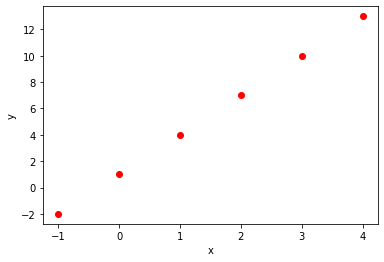

In [0]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('y')
plt.plot(xs, ys, 'ro')
plt.show()

In [0]:
print(xs)
print(ys)

[-1.  0.  1.  2.  3.  4.]
[-2.  1.  4.  7. 10. 13.]


이제 신경망을 정의하는데 필요한 모든 코드를 작성하였다. 다음에는 이를 학습시켜서 입력 데이터와 출력 데이터 간의 패턴을 추론하여 모델을 생성하는데 사용한다. 

### **3. Training the neural network (신경망 학습)**

입력 데이터와 출력 데이터 간의 관계를 학습하기 위해 `model.fit()` 메소드(함수)를 사용한다. 다음은 앞의 `xs` 와 `ys` 학습 데이터와 `epoch` 수를  500번을 설정하여 반복을 500번 하도록 설정하고 `fit()` 메소드를 호출하는 코드이다. 이 코드를 수행하면 각 단계의 손실(loss)을 출력한다. 

In [0]:
model.fit(xs, ys, epochs=500)

이 학습에서는 500 번 까지 반복하지 않아도 된다는 것을 확인할 수 있다. 약 250번 정도만 해도 아주 적은 손실을 볼 수 있을 것이다.

### **4. Using the Model(모델 사용하기)**

학습이 끝나서 모델이 만들어졌다. 모델을 사용하기 위해서는 `model.predict()` 메소드를 사용한다. 다음은 x = 10 일 때 y 의 값이 얼마가 되는지 예측하고 예측결과를 화면에 출력한 것이다.

In [0]:
print(model.predict([10.0]))

[[31.005054]]


## **Model 2: simple linear regression (단순선형회귀분석)**

변수들 사이의 관계를 분석하는데 사용하는 **통계학적 방법으**로 **알고리즘의 개념이 복잡하지 않고 다양한 문제에 폭넓게 적용할 수 있다는 장점**을 가진다. 

선형회귀분석은 독립변수 x<sub>i</sub>, 상수항 b와 종속변수 y 사이의 관계를 모델링하는 방법이다. 

선형회귀의 경우 가설(hypothesis)은 특징 또는 독립 변수(x)의 함수만큼 가능한 정확하게 응답 값(y)와 같은 직선이다. 

y = W*x +b

In [0]:
# import numpy
import numpy as np

### **1. random number generation for Linear regression**


In [0]:
# 1000 개의 random number를 생성

numPoints = 1000
vectorsSet = []

for i in range(numPoints):
  x1 = np.random.normal(0.0, 0.55)
  y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
  vectorsSet.append([x1, y1])

xData = [v[0] for v in vectorsSet]
yData = [v[1] for v in vectorsSet]


* xData, yData 값을 그래프로 그려본다.

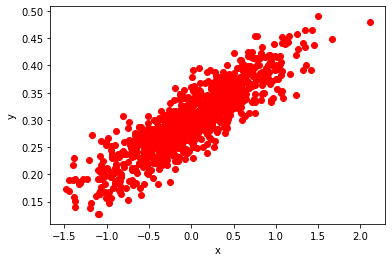

In [0]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'ro')
plt.show()

* 만들어진 데이터로 부터 900개의 학습용 데이터와 100개의 테스트용 데이터를 나뉘준다.
  - 배열에서 앞의 900개를 학습 데이터로 나머지 100개를 테스트 데이터로 설정

In [0]:
trainX = xData[:900]
testX = xData[900:]
trainY = yData[:900]
testY = yData[900:]

* 확률적으로 900개의 학습 데이터와 100개의 테스트 데이터로 설정



In [0]:
from sklearn.model_selection import train_test_split
p_trainX, p_testX, p_trainY, p_testY = train_test_split(xData, yData, test_size = 0.1)

print(len(p_trainX))
print(len(p_testX))

900
100


## **2. Build the model (모델 생성)**

* 입력이 한 개 이고 게층이 한 개인 신경망 생성



In [0]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer0])
model.compile(loss='mean_squared_error', optimizer='sgd')

##3. **Training the neural network (신경망 학습)**

In [0]:
history = model.fit(p_trainX, p_trainY, epochs=500, verbose=False)

Epoch 1/500
29/29 [==============================] - 0s 887us/step - loss: 0.4477
Epoch 2/500
29/29 [==============================] - 0s 849us/step - loss: 0.2650
Epoch 3/500
29/29 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 4/500
29/29 [==============================] - 0s 890us/step - loss: 0.1253
Epoch 5/500
29/29 [==============================] - 0s 846us/step - loss: 0.0831
Epoch 6/500
29/29 [==============================] - 0s 884us/step - loss: 0.0593
Epoch 7/500
29/29 [==============================] - 0s 875us/step - loss: 0.0400
Epoch 8/500
29/29 [==============================] - 0s 843us/step - loss: 0.0286
Epoch 9/500
29/29 [==============================] - 0s 849us/step - loss: 0.0198
Epoch 10/500
29/29 [==============================] - 0s 850us/step - loss: 0.0143
Epoch 11/500
29/29 [==============================] - 0s 870us/step - loss: 0.0103
Epoch 12/500
29/29 [==============================] - 0s 838us/step - loss: 0.0073
Epoch 13/500
29

In [0]:
weights = layer0.get_weights()
weight = weights[0][0]
bias = weights[1]
print('weight: {}, bias: {}'.format(weight, bias))

weight: [0.09924886], bias: [0.29875278]


In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


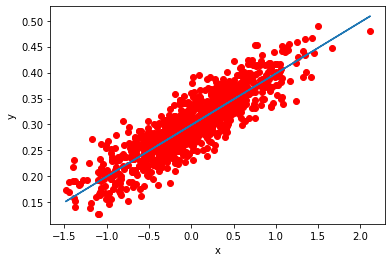

In [0]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xData, yData, 'ro')
plt.plot(xData, weight * xData + bias)
plt.show()

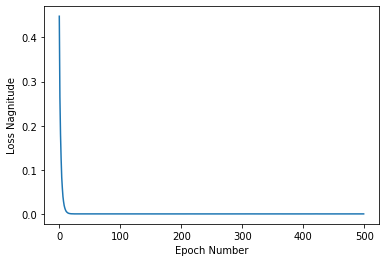

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Nagnitude')
plt.plot(history.history['loss'])
plt.show()

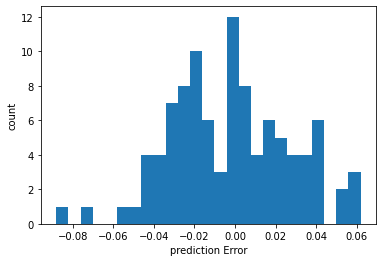

In [0]:
yPrediction = model.predict(p_testX).flatten()
error = yPrediction - p_testY
plt.hist(error, bins = 25)
plt.xlabel('prediction Error')
plt.ylabel('count')
plt.show()